Found mnist Data
Found celeba Data
TensorFlow Version: 1.13.1
Default GPU Device: /device:GPU:0


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:554: RuntimeWarning: divide by zero encountered in log


Explained variance percentage = 1.00
Epoch 1/50 50 steps - training losses:  discriminator: 2.0502 | generator 0.2552


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:227: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.


Save image


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\base.py:253: UserWarning: Trying to unpickle estimator OneClassSVM from version 0.20.2 when using version 0.20.3. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


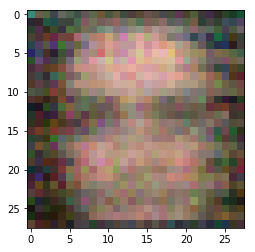

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:362: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.


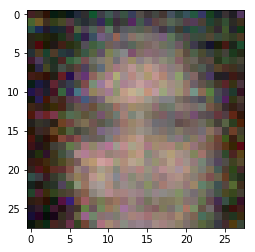

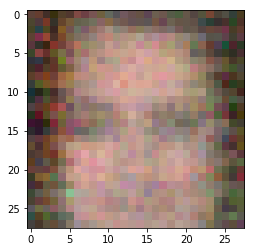

Total de datos: 16, Total aciertos: 3
Porcentaje exitos: 0.1875
Epoch 1/50 100 steps - training losses:  discriminator: 0.8012 | generator 1.6256


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:227: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.


Save image


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\base.py:253: UserWarning: Trying to unpickle estimator OneClassSVM from version 0.20.2 when using version 0.20.3. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


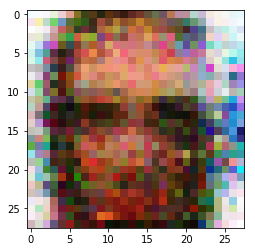

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:362: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.


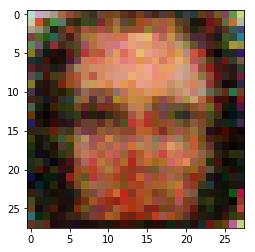

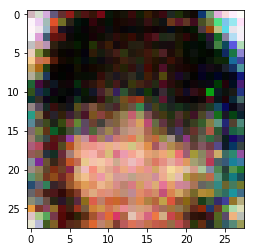

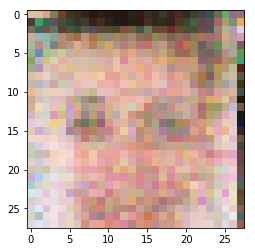

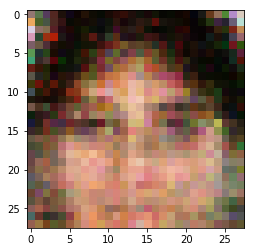

Total de datos: 32, Total aciertos: 8
Porcentaje exitos: 0.25
Epoch 1/50 150 steps - training losses:  discriminator: 0.8495 | generator 1.8845


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:227: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.


Save image


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\base.py:253: UserWarning: Trying to unpickle estimator OneClassSVM from version 0.20.2 when using version 0.20.3. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


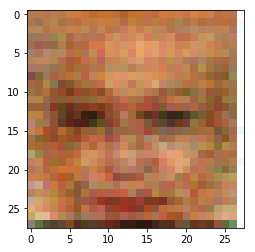

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:362: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.


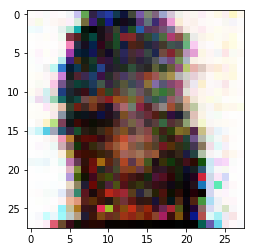

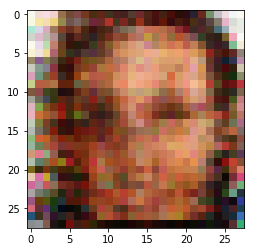

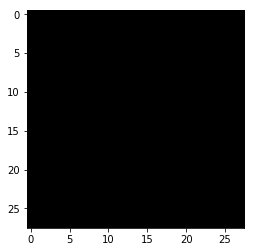

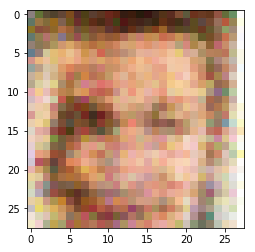

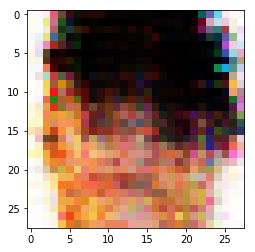

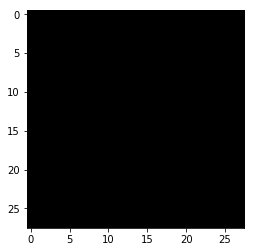

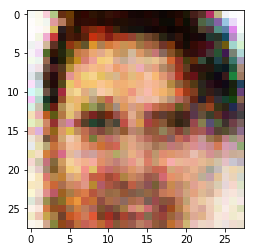

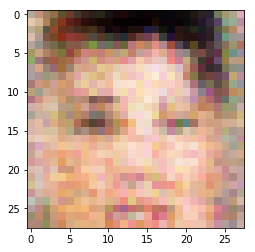

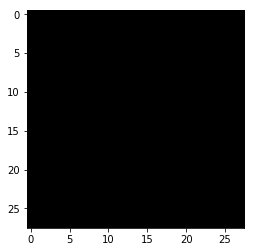

Total de datos: 48, Total aciertos: 18
Porcentaje exitos: 0.375


KeyboardInterrupt: 

In [5]:
import os
from glob import glob
from matplotlib import pyplot
from distutils.version import LooseVersion
import warnings
import tensorflow as tf
from tensorflow.python.saved_model import tag_constants
import os
import shutil
import helper1
import problem_unittests as tests
import cv2 
from PIL import Image
import numpy as np                # funciones numéricas (arrays, matrices, etc.)
import matplotlib.pyplot as plt   # funciones para representación gráfica
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from numpy import inf
import scipy.misc
from sklearn.externals import joblib
import pickle
import time


    
# Se crea la funcion que inicializa los placeholder del grafo del tensor flow
def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Se crean las entradas del modelo
    :param image_width: El ancho de la imagen  --> 28
    :param image_height: La altura de la imagen --> 28
    :param image_channels: El numero de capas de la imagen RGB --> 3
    :param z_dim: La dimension de z --> 100
    :return: Una tupla de (Un tensor de salidas reales, un tensor con los datos de z, la tasa de aprendizaje)
    """
    
    tensor_real_imput_img = tf.placeholder(tf.float32, shape=(None, image_width, image_height, image_channels))
    tensor_z_data = tf.placeholder(tf.float32, shape=(None, z_dim))
    learning_rate = tf.placeholder(tf.float32)

    return (tensor_real_imput_img, tensor_z_data, learning_rate)

# Se crea la funcion que genera el discriminador de la red GAN
def discriminator(images, reuse=False, alpha=0.2):
    """
    Se crea el discriminador de la red
    :param images: Tensor con la entrada de la imagen(es)--> Tensor("Placeholder:0", Tamaño=(?, 28, 28, 3), dtype=float32)
    :param reuse: Booleano si los pesos deben ser reutilizados.
    :return: Una tupla de (Un tensor de salida del discriminador, Un tensor logits del discriminador)
    """
    with tf.variable_scope('discriminator', reuse=reuse):
        # input layer --> 28, 28, 3
        
        start_dim = 28*2
        kernel_sz = 5
        strides = 2

        layer_0 = tf.layers.conv2d(images, start_dim, kernel_sz, strides=strides, padding='same', 
                                   kernel_initializer=tf.contrib.layers.xavier_initializer(uniform=True,
                                                                                          seed=None,
                                                                                          dtype=tf.float32
                                                                                          )
                                  )
        relu_0 = tf.maximum(alpha * layer_0, layer_0)
        #14*14*56
        
        layer_1 = tf.layers.conv2d(relu_0, start_dim*2, kernel_sz, strides=strides, padding='same')
        batchnorm_1 = tf.layers.batch_normalization(layer_1, training=True)
        relu_1 = tf.maximum(alpha * batchnorm_1, batchnorm_1)
        #  7, 7, 112
        
        layer_2 = tf.layers.conv2d(relu_1, start_dim*4, kernel_sz, strides=strides, padding='same')
        batchnorm_2 = tf.layers.batch_normalization(layer_2, training=True)
        relu_2 = tf.maximum(alpha * batchnorm_2, batchnorm_2)
        #4, 4, 224
        
        layer_3 = tf.layers.conv2d(relu_2, start_dim*8, kernel_sz, strides=strides, padding='same')
        batchnorm_3 = tf.layers.batch_normalization(layer_2, training=True)
        relu_3 = tf.maximum(alpha * batchnorm_3, batchnorm_3)
        relu_3_d = tf.nn.dropout(relu_3, 0.8)
        #4, 4, 224
        
        flatten = tf.reshape(relu_3_d, (-1, (start_dim*4)*4*4)) 
            
        logits = tf.layers.dense(flatten, 1)
        output = tf.sigmoid(logits)

    return (output, logits)

# Se crea la funcion que crea el generador de la red GAN
def generator(z, out_channel_dim, is_train=True, alpha=0.2):
    """
    Se crea el generador de la Red
    :param z: Input z --> Tensor("Placeholder:0", Tamaño=(?, 100), dtype=float32)
    :param out_channel_dim: Numero de canales en la capa de salida --> 5
    :param is_train: Booleano si el generador está siendo utilizado para entrenamiento.
    :return: El tensor de salida del generador
    """
    with tf.variable_scope('generator', reuse=not is_train):
        start_dim = 512
        kernel_sz = 5
        strides = 2

        layer_0 = tf.layers.dense(z, 7*7*start_dim)
    
        layer_0 = tf.reshape(layer_0, (-1, 7, 7, start_dim))
        layer_0 = tf.layers.batch_normalization(layer_0, training=is_train)
        # 7, 7, 512 
      
        layer_1 = tf.layers.conv2d_transpose(layer_0, int(start_dim/2), kernel_sz, 
                                             strides=strides, padding='same', 
                                             kernel_initializer=tf.contrib.layers.xavier_initializer(uniform=True,
                                                                                          seed=None,
                                                                                          dtype=tf.float32
                                                                                          )
                                            )
        layer_1 = tf.layers.batch_normalization(layer_1, training=is_train)
        relu_1 = tf.maximum(alpha * layer_1, layer_1)
        # 14, 14, 256
    
        layer_2 = tf.layers.conv2d_transpose(layer_1, int(start_dim/4), kernel_sz, strides=strides, padding='same')
        layer_2 = tf.layers.batch_normalization(layer_2, training=is_train)
        relu_2 = tf. maximum(alpha * layer_2, layer_2)
        # 28, 28, 128
        
        layer_3 = tf.layers.conv2d_transpose(layer_2, int(start_dim/8), kernel_sz, strides=strides, padding='same')
        layer_3 = tf.layers.batch_normalization(layer_3, training=is_train)
        relu_3 = tf. maximum(alpha * layer_3, layer_3)
        relu_3_d = tf.nn.dropout(relu_3, 0.8)
        # 28, 28, 128

    
        logits = tf.layers.conv2d_transpose(relu_3_d, out_channel_dim, kernel_sz, strides=strides, padding='same')
        logits = tf.reshape(logits, (-1, 28, 28, out_channel_dim))
        # 28, 28, 5
        output = tf.tanh(logits)
        
        return output
    
# Funcion que calcula las perdidas del modelo    
def model_loss(input_real, input_z, out_channel_dim):
    """
    Calcula las perdidas del generados y el discriminador 
    :param input_real: Imagenes del dataset real
    :param input_z: salida Z
    :param out_channel_dim: Numero de canales en la imagen de salida
    :return: Una tupla de (La perdida del discriminador, la perdida del generador)
    """
    smooth = 0.1
    alpha = 0.2
    
    # Generador con la salida Z
    g_mod = generator(input_z, out_channel_dim, alpha=alpha)
    
    # discriminador con la entrada real y la salida g_mod
    d_out_real, d_log_real = discriminator(input_real, alpha=alpha)
    d_out_fake, d_log_fake = discriminator(g_mod, reuse=True, alpha=alpha)
    
    d_loss_real = tf.reduce_mean(
                                tf.nn.sigmoid_cross_entropy_with_logits(
                                    logits=d_log_real,
                                    labels=tf.ones_like(d_out_real)*0.9
                                 ))
    
    d_loss_fake = tf.reduce_mean(
                                tf.nn.sigmoid_cross_entropy_with_logits(
                                logits=d_log_fake,
                                labels=tf.zeros_like(d_out_fake)))
    
    d_loss = d_loss_real + d_loss_fake
    
    g_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_log_fake,
                                                                 labels=tf.ones_like(d_out_fake)))
    
    
    return (d_loss, g_loss)

# Funcion que define el modelo de optimizacion 
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Obtener operaciones de optimización
    :param d_loss: Tensor de perdida del discriminador 
    :param g_loss: Tensor de perdida del generador
    :param learning_rate: Placeholder de la tasa de aprendizaje
    :param beta1: La tasa de decaimiento exponencial para el primer momento en el optimizador --> 0.9 (eg less than 1)
    :return: Una tupla de (Operación de entrenamiento discriminador, Operación de entrenamiento generador)
    """
    train_vars = tf.trainable_variables()
    
    #generador de variables de tamaño (3,3), float32
    d_vars = [var for var in train_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in train_vars if var.name.startswith('generator')]
    
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_op = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_op = tf.train.AdamOptimizer(learning_rate,beta1=beta1).minimize(g_loss, var_list=g_vars)

    return (d_train_op, g_train_op)


# Se crea la funcion que muestra la salida del generador
def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode, epoch, TotalPositivos, Total):
    """
    Muestra un ejemplo de la salida del generador
    :param sess: La seccion de Tensor flow
    :param n_images: numero de imagenes que se mostraran
    :param input_z: Entrada Z del tensor
    :param out_channel_dim: Numero de canales de la imagen de salida
    :param image_mode: El modo a utilizar para las imágenes ("RGB" o "L")
    """
    
    # Carpeta en donde se guardara las imagenes
    sample_directory = './figs' 
    
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])
    # Se generan nuevas imagenes
    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})
    # Se crea una grilla de imagenes
    images_grid = helper1.images_square_grid(samples, image_mode)
    # Se guarda la imagen en memoria
    if not os.path.exists(sample_directory):
        os.makedirs(sample_directory)
    scipy.misc.imsave(sample_directory + '/fig' + '.png', images_grid)
    print('Save image')
    cont3 = 0
    I4 = np.zeros([16, 28*28])
    # Se carga la imagen previamente guardada
    foto = Image.open(os.path.join("figs/","fig.png"))
    
    # Se recorda cada imagen de la grilla y se le aplica la trasformada de fourier
    foto2 = foto.crop((1, 1, 28, 28))
    
    magnitude_spectrum2 = transformation(foto2)
    
    I4[cont3, :] = magnitude_spectrum2.ravel()
    cont3 = cont3 + 1
    
    foto3 = foto.crop((28, 1, 56, 28))
   
    magnitude_spectrum2 = transformation(foto3)
    
    I4[cont3, :] = magnitude_spectrum2.ravel()
    cont3 = cont3 + 1
    
    foto4 = foto.crop((56, 1, 84, 28))
    magnitude_spectrum2 = transformation(foto4)
    
    I4[cont3, :] = magnitude_spectrum2.ravel()
    cont3 = cont3 + 1
    
    foto4 = foto.crop((84, 1, 112, 28))
    magnitude_spectrum2 = transformation(foto4)
    
    I4[cont3, :] = magnitude_spectrum2.ravel()
    cont3 = cont3 + 1
    
    ##
    foto2 = foto.crop((1, 28, 28, 56))
    
    magnitude_spectrum2 = transformation(foto2)
    
    I4[cont3, :] = magnitude_spectrum2.ravel()
    cont3 = cont3 + 1
    foto3 = foto.crop((28, 28, 56, 56))
   
    magnitude_spectrum2 = transformation(foto3)
    
    I4[cont3, :] = magnitude_spectrum2.ravel()
    cont3 = cont3 + 1
    
    foto4 = foto.crop((56, 28, 84, 56))
    magnitude_spectrum2 = transformation(foto4)
    
    I4[cont3, :] = magnitude_spectrum2.ravel()
    cont3 = cont3 + 1
    
    foto4 = foto.crop((84, 28, 112, 56))
    magnitude_spectrum2 = transformation(foto4)
    
    I4[cont3, :] = magnitude_spectrum2.ravel()
    cont3 = cont3 + 1
    
    ##
    
    foto2 = foto.crop((1, 56, 28, 84))
    
    magnitude_spectrum2 = transformation(foto2)
    
    I4[cont3, :] = magnitude_spectrum2.ravel()
    cont3 = cont3 + 1
    foto3 = foto.crop((28, 56, 56, 84))
   
    magnitude_spectrum2 = transformation(foto3)
    
    I4[cont3, :] = magnitude_spectrum2.ravel()
    cont3 = cont3 + 1
    
    foto4 = foto.crop((56, 56, 84, 84))
    magnitude_spectrum2 = transformation(foto4)
    
    I4[cont3, :] = magnitude_spectrum2.ravel()
    cont3 = cont3 + 1
    
    foto4 = foto.crop((84, 56, 112, 84))
    magnitude_spectrum2 = transformation(foto4)
    
    I4[cont3, :] = magnitude_spectrum2.ravel()
    cont3 = cont3 + 1
    
    ##
    
    foto2 = foto.crop((1, 84, 28, 112))
    
    magnitude_spectrum2 = transformation(foto2)
    
    I4[cont3, :] = magnitude_spectrum2.ravel()
    cont3 = cont3 + 1
    foto3 = foto.crop((28, 84, 56, 112))
   
    magnitude_spectrum2 = transformation(foto3)
    
    I4[cont3, :] = magnitude_spectrum2.ravel()
    cont3 = cont3 + 1
    
    foto4 = foto.crop((56, 84, 84, 112))
    magnitude_spectrum2 = transformation(foto4)
    
    I4[cont3, :] = magnitude_spectrum2.ravel()
    cont3 = cont3 + 1
    
    foto4 = foto.crop((84, 84, 112, 112))
    magnitude_spectrum2 = transformation(foto4)
    
    I4[cont3, :] = magnitude_spectrum2.ravel()
    cont3 = cont3 + 1
    
    I4[I4 == -inf] = 100
    # Se le aplica el PCA (previamente entrenado con los datos de entrenamiento)
    X = pca.transform(I4)
    # Se carga el modelo que reconoce caras, (previamente entrenado)
    fid = open('Binary Model/Clasificador_de_caras_Furier.joblib.pkl', 'rb')
    joblib_Model = joblib.load(fid)
    # Se le pasa las imagenes creadas por la GAN
    PrediccionTest = joblib_Model.predict(X)
    pos = [1, 28, 56, 84, 112]
    contx = 0
    conty = 0
    Total = Total + 16
    # Se guardan solo aquellas que reconocio como caras
    for i in range(0, 16):
        if PrediccionTest[i] == 1:
            TotalPositivos = TotalPositivos + 1
            foto2 = foto.crop((pos[contx], pos[conty], pos[contx] + 28, pos[conty] + 28))
            pyplot.imshow(foto2, cmap=cmap)
            pyplot.show()
            if not os.path.exists(sample_directory):
                os.makedirs(sample_directory)
            scipy.misc.imsave(sample_directory + '/fig_' + str(i) + '_epoch_' + str(epoch) + '.png', foto2)
        contx = contx + 1
        if contx == 5:
            contx = 0; 
            conty = conty + 1
    return TotalPositivos, Total

# Se crea una funcion que hace la trasformada de furier y devuelve la matriz resultante
def transformation(foto):
    width = 28
    height = 28
    datos3 = foto.getdata()
    #para el calculo del promedio se utilizara la division entera con el operador de division doble "//" para evitar decimales
    promedio = [(datos3[x][0] + datos3[x][1] + datos3[x][2]) // 3 for x in range(len(datos3))]
    imagen_gris3 = Image.new('L', foto.size)
    imagen_gris3.putdata(promedio)
    imagen_gris4 = imagen_gris3.resize((width, height), Image.NEAREST)
    imagen_gris4 = np.array(imagen_gris4)
    dft = cv2.dft(np.float32(imagen_gris4),flags = cv2.DFT_COMPLEX_OUTPUT)
    dft_shift = np.fft.fftshift(dft)
    magnitude_spectrum2 = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
    
    return magnitude_spectrum2

# Se crea una funcion que entrenara la red GAN
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches,
          data_shape, data_image_mode):
    """
    Entrenamiento de la GAN
    :param epoch_count: Numero de epocas
    :param batch_size: Tamaño del batch
    :param z_dim: dimencion de Z --> 100
    :param learning_rate: Tasa de aprendizaje
    :param beta1: La tasa de decaimiento exponencial para el primer momento en el optimizador
    :param get_batches: Funcion para obtener los batches
    :param data_shape: Tamaño de los datos --> (60000, 28, 28, 1)
    :param data_image_mode: El modo de imagen a utilizar para imágenes ("RGB" o "L")
    """
    # Carpeta en donde se guardara el modelo entrenado
    model_directory = './models' 
    TotalPositivos = 0
    Total = 0
    steps = 0
    div_by = 20
    n_images = 10
    image_mode="RGB"
    samples=[]
    GenerativeLosss = 0
    input_real, input_z, lr = model_inputs(data_shape[1], 
                                                      data_shape[2], 
                                                      data_shape[3], 
                                                      z_dim)
    # --> Tensor("Placeholder:0", shape=(?, 28, 28, 1), dtype=float32) 
    # Tensor("Placeholder_1:0", shape=(?, 100), dtype=float32)
    # Tensor("Placeholder_2:0", dtype=float32)
    z_batch_F = np.random.uniform(-1, 1, size=(1000, z_dim))        
    d_loss, g_loss = model_loss(input_real, input_z, data_shape[3])
    # --> Tensor("add:0", shape=(), dtype=float32), Tensor("Mean_2:0", shape=(), dtype=float32) 
    
    d_train_op, g_train_op = model_opt(d_loss, g_loss, learning_rate, beta1)

    init = tf.initialize_all_variables()
    
    # Se inicia la Seccion de tensor flow
    
    with tf.Session() as sess:
        sess.run(init)
        for epoch_i in range(epoch_count):
            start_time = time.time()
            G_promedio = 0
            cont = 0
            for batch_images in get_batches(batch_size):
                steps += 1
                batch_images = batch_images * 2
                # un simple ruido blanco
                z_batch = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                
                # Enganchar optimizadores para discriminador y generador.
                _ = sess.run(d_train_op, feed_dict={input_real: batch_images,
                                                    input_z: z_batch, 
                                                    lr:learning_rate})
                
                _ = sess.run(d_train_op, feed_dict={input_real: batch_images,
                                    input_z: z_batch, 
                                    lr:learning_rate})
                
                _ = sess.run(g_train_op, feed_dict={input_real: batch_images,
                                                    input_z: z_batch,
                                                    lr: learning_rate})
                _ = sess.run(g_train_op, feed_dict={input_real: batch_images,
                                    input_z: z_batch,
                                    lr: learning_rate})
                _ = sess.run(g_train_op, feed_dict={input_real: batch_images,
                    input_z: z_batch,
                    lr: learning_rate})
        
            
                # Se optiene la perdida del generado y discriminador para imprimirla
                G_promedio = G_promedio + g_loss.eval({input_z: z_batch})
                cont = cont + 1
                if steps % 50 == 0:
                    d_train_loss = d_loss.eval({input_real: batch_images, input_z: z_batch})
                    g_train_loss = g_loss.eval({input_z: z_batch})
                    

                    print("Epoch {}/{} {} steps".format(epoch_i+1, epoch_count, steps), 
                         "- training losses: "
                         " discriminator: {:.4f}".format(d_train_loss),
                         "| generator {:.4f}".format(g_train_loss))
                    # Se llama la funcion que genera una nueva cara
                    if steps % 300 == 0:
                        if data_shape[3] == 1:
                            image_mode= "L"
                        TotalPositivos, Total = show_generator_output(sess, 1, input_z, data_shape[3], image_mode, epoch_i, TotalPositivos, Total)
                        print('Total de datos: ' + str(Total) + ', Total aciertos: ' + str(TotalPositivos))
                        print('Porcentaje exitos: ' + str(TotalPositivos/Total))
            #d_train_loss = d_loss.eval({input_real: batch_images, input_z: z_batch})
            G_promedio = G_promedio/cont
            print('promedio generator loss: ' + str(G_promedio))
            # Se guarda el modelo con mejor perdida en el generador
            if GenerativeLosss < G_promedio:
                file = open('Generative_loss.txt', 'w')
                file.write(str(epoch_i) + ': ' + str(g_train_loss))
                file.close()
                GenerativeLosss = g_train_loss
                saver = tf.train.Saver()
                if not os.path.exists(model_directory):
                    os.makedirs(model_directory)
                saver.save(sess,model_directory+'/model-' + str(epoch_i) + '.cptk')
                print("Saved Model") 
            # Se calcula el tiempo de ejecucion de la epoca    
            Elapse = time.time() - start_time
            print("Time of simulation epoch" + str(epoch_i) + ": " + str(Elapse))
            # Se deja descansar el procesador por un minuto
            time.sleep(60)

#def main():
    
# Se cargan los dataset de entrenamiento 
data_dir = '/input/R5KrjnANiKVhLWAkpXhNBe'

# mnist es el dataset de numeros
helper1.download_extract('mnist', data_dir)
# celeba es el dataset de caras
helper1.download_extract('celeba', data_dir)

# Se carga 25 imagenes del dataset de numeros para mostrarlos en una grilla, estas imagenes se escalan a 28x28
show_n_images = 25
mnist_images = helper1.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper1.images_square_grid(mnist_images, 'L'), cmap='gray')

# Se carga 4 imagenes del dataset de caras para mostrarlos en una grilla, estas imagenes se escalan a 28x28
show_n_images = 4
mnist_images = helper1.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper1.images_square_grid(mnist_images, 'RGB'))

# Se verifica la version del tensorflow
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Se verifica si hay disponible una GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))        

# nombre de la carpeta que contiene el Dataset de caras (el que se utilizo para el entrenamiento del SVM)
carpeta = "1Dataset/"
cont = 0
width = 28
height = 28
# Se crea un arreglo de ceros del tamaño n_imagesx28x28
for archivo in os.listdir(carpeta):
    cont = cont + 1
I2 = np.zeros([cont, width, height])
cont = 0
# Se rellena el arreglo con la informacion de las imagenes
for archivo in os.listdir(carpeta):
    # Se lee la imagen y se gurda su informacion
    foto = Image.open(os.path.join(carpeta,archivo))
    datos = foto.getdata()

    # Se convierte en escala de grises   
    promedio = [(datos[x][0] + datos[x][1] + datos[x][2]) // 3 for x in range(len(datos))]
    imagen_gris = Image.new('L', foto.size)
    imagen_gris.putdata(promedio)
    # Se reescala a 28x28
    imagen_gris2 = imagen_gris.resize((width, height), Image.NEAREST) 
    # Se le hace la trasformada de furier
    imagen_gris2 = np.array(imagen_gris2)
    dft = cv2.dft(np.float32(imagen_gris2),flags = cv2.DFT_COMPLEX_OUTPUT)
    dft_shift = np.fft.fftshift(dft)
    magnitude_spectrum2 = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
    I2[cont, :, :] = magnitude_spectrum2
    cont = cont + 1

# Se convierte las matrices de 28x28 a un vector de 1x784

I3 = np.zeros([cont, width * height])
for i in range(0, cont):
    I3[i, :] = I2[i, :, :].ravel()
# Se selecionan las primeras 10000 para entrenar el PCA
X_train = I3[:10000, :]
X_train[X_train == -inf] = 100

pca = PCA(n_components=400, whiten=True)
pca = pca.fit(X_train)
print('Explained variance percentage = %0.2f' % sum(pca.explained_variance_ratio_))

# Se establecen los parametros del modelo
batch_size = 32
z_dim = 100 
learning_rate = 0.0002
beta1 = 0.3

epochs = 50
# Se carga el data set de caras (Celeba)
celeba_dataset = helper1.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
# Se inicializa al grafo de tensor flow y se ejecuta el entrenamiento 
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

#if __name__== "__main__":
#    main()
